In [1]:
%matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
import numpy as np
import matplotlib.pyplot as plt
import math
from rootpy.io import root_open
from rootpy import asrootpy
import rootpy.plotting.root2matplotlib as rplt
from ExpData import SimData
import ExpData as ed

goldenaspect=lambda x, rows=1, cols=1: (x,0.95*x/cols*rows/1.618)

In [2]:
def add_hist(h2, ax, W, Q2, dW=0.2, dQ2=1.0,
             pad=0.2, majax_w=1,
             vmin=0, vmax=1,
             hidex=True, hidey=True):
    rW, rQ2 = ax.get_xlim(), ax.get_ylim() # (1.6,3.2), (1,6)
    normW, normQ2 = rW[1]-rW[0], rQ2[1]-rQ2[0]
    l = (W-rW[0] - (dW*(1-pad))/2)/normW*majax_w
    b = (Q2-rQ2[0] - (dQ2*(1-pad))/2)/normQ2 # - rQ2[0]
    w = (dW*(1-pad))/normW*majax_w
    h = (dQ2*(1-pad))/normQ2
    rect = l,b,w,h
    ax1 = fig.add_axes(rect)
    ax1.set_xlim(-math.pi,math.pi)
    ax1.set_ylim(-1,1)
    im = rplt.imshow(asrootpy(h2), axes=ax1,
                     vmin=vmin, vmax=vmax)
    ax1.tick_params(axis='both', labelsize=6)
    if hidex:
        ax1.set_xticklabels([])
    if hidey:
        ax1.set_yticklabels([])
    # ax1.set_xlabel(r'$\phi^*$', fontdict={'fontsize':8})
    return ax1, im

In [203]:
sds = []
q2strs = ['1.75-2.75', '1.75-2.75', '2.25-3.25', '2.25-3.25',
          '2.75-3.75', '2.75-3.75',
          '3.25-4.25', '3.75-4.75', '4.25-5.25']
q2rs = []
for q2str in [q2strs[0],q2strs[2],q2strs[4]]:
    (q2_0, q2_1) = [float(q2) for q2 in q2str.split('-')]
    q2rs.append([q2_0+0.16, q2_0+0.45])
    q2rs.append([q2_0+0.46, q2_1-0.25])
q2rs.append([3.35,4.15])
q2rs.append([3.85,4.65])
q2rs.append([4.35,5.15])
for q2r,q2str in zip(q2rs,q2strs):
    dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
    sim_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str
    h6r_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str.replace('.','').replace('-','_') #parms.e1f_sim_fn
    h6r_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'

    sds.append(SimData())
    sds[-1].add_sim('%s/%s'%(dirin,sim_fn),
                    h6rdir=h6r_dir,
                    h6rfn='%s/%s'%(dirin,h6r_fn))
# h2 = sd.get_acc2d(1.81, q2r)

nbins_X = []
for sd,q2r,Q2 in zip(sds,q2rs,[i+2.0 for i in range(0,len(q2rs))]):
    for W in np.arange(1.73,2.82,0.02): #[1.81, 2.01, 2.21, 2.41, 2.61, 2.81]:
        nbins_t, nbins_tr, nbins_rNOTt, nbins_tNOTr, nbins_a, nbins_f = 0,0,0,0,0,0

        h2s = sd.get_acc2d(W, q2r, lo_acc=0.02, mask=0.15)[0]
        h2 = h2s[3]
        xy_masks = []
        for iy in range(1,h2.nbins(1)+1):
            for ix in range(1,h2.nbins(0)+1):
                if h2s[0].z(ix,iy) > 0:
                    nbins_t += 1
                    if h2s[1].z(ix,iy) > 0:
                        nbins_tr += 1
                    else:
                        nbins_tNOTr += 1
                else:
                    if h2s[1].z(ix,iy) > 0:
                        nbins_rNOTt += 1
                v = h2.z(ix,iy)
                if v == 0:
                    if h2s[0].z(ix,iy) > 0:
                        xy_masks.append((h2.x(ix), h2.y(iy)))
                        nbins_f += 1
                else:
                    nbins_a += 1
        nbins_X.append((W,Q2,nbins_t, nbins_tr, nbins_rNOTt, nbins_tNOTr, nbins_a, nbins_f))
        
print([sum(N) for N in zip(*[tup[2:] for tup in nbins_X])])

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_4.25-5.25_ho.root
**************


/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/numpy/ma/extras.py:588: RuntimeWarning: invalid value encountered in double_scalars
  result = n / d


[82620, 67747, 0, 14873, 61730, 20890]


In [3]:
sds = []
q2strs = ['1.75-2.75', '2.25-3.25', '2.75-3.75',
          '3.25-4.25', '3.75-4.75', '4.25-5.25']
q2strs = ['1.75-2.75', '2.75-3.75', '3.75-4.75', '4.25-5.25']
# q2rs = [[i+1.91,i+2.2] for i in range(0,len(q2strs))]
q2rs = [[i+1.85,i+2.65] for i in range(0,len(q2strs))]
# q2str = q2strs[0]
for q2r,q2str in zip(q2rs,q2strs):
    dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
    sim_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str
    h6r_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str.replace('.','').replace('-','_') #parms.e1f_sim_fn
    h6r_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'

    sds.append(SimData())
    sds[-1].add_sim('%s/%s'%(dirin,sim_fn),
                    h6rdir=h6r_dir,
                    h6rfn='%s/%s'%(dirin,h6r_fn))

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/numpy/ma/extras.py:588: RuntimeWarning: invalid value encountered in double_scalars
  result = n / d


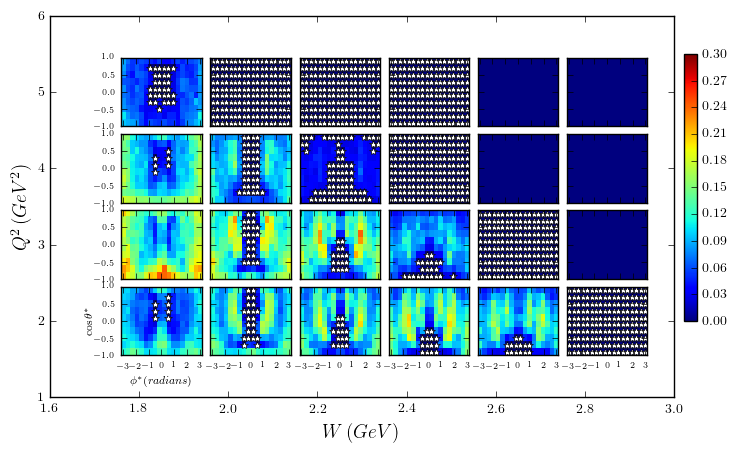

In [7]:
majax_width = 0.96
fig = plt.figure(figsize=goldenaspect(6.5))
ax = fig.add_axes([0,0,majax_width,1])
# ax = fig.gca()
ax.set_xlim(1.6,3.0)
ax.set_ylim(1,6)
ax.set_ylabel(r'$Q^2\,(GeV^2)$', fontdict={'fontsize':14})
ax.set_xlabel(r'$W\,(GeV)$', fontdict={'fontsize':14})
# ax.grid()

vmax=0.3
im = None
first_Q2 = True
nbins_X = []
for sd,q2r,Q2 in zip(sds,q2rs,[i+2.0 for i in range(0,len(q2rs))]):
    first_W = True
    for W in np.arange(1.85, 2.9,0.2): #[1.81, 2.01, 2.21, 2.41, 2.61, 2.81]:
        nbins_t, nbins_tr, nbins_rNOTt, nbins_tNOTr, nbins_a, nbins_f = 0,0,0,0,0,0

        h2s = sd.get_acc2d(W, q2r, lo_acc=0.025, mask=0.15)[0]
        h2 = h2s[4]
        ax1, im1 = add_hist(h2, ax, W, Q2, vmax=vmax, vmin=0, pad=0.1,
                           hidex=False, hidey=False, majax_w=majax_width)
        h2 = h2s[3]
        xy_masks = []
        for iy in range(1,h2.nbins(1)+1):
            for ix in range(1,h2.nbins(0)+1):
                if h2s[0].z(ix,iy) > 0:
                    nbins_t += 1
                    if h2s[1].z(ix,iy) > 0:
                        nbins_tr += 1
                    else:
                        nbins_tNOTr += 1
                else:
                    if h2s[1].z(ix,iy) > 0:
                        nbins_rNOTt += 1
                v = h2.z(ix,iy)
                if v == 0:
                    if h2s[0].z(ix,iy) > 0:
                        xy_masks.append((h2.x(ix), h2.y(iy)))
                        nbins_f += 1
                else:
                    nbins_a += 1
        if len(xy_masks) > 0:
            X,Y = zip(*xy_masks)
            ax1.plot(X,Y, 'w*')
        im = im1 if im is None else im
        if first_W and first_Q2:
            ax1.set_xlabel(r'$\phi^* (radians)$', fontdict={'fontsize':8})
            ax1.set_ylabel(r'$\cos{\theta^*}$', fontdict={'fontsize':8})
            ax1.yaxis.labelpad = 0
        if not first_W:
            ax1.set_yticklabels([])
        first_W = False
        if not first_Q2:
            ax1.set_xticklabels([])
        nbins_X.append((W,Q2,nbins_t, nbins_tr, nbins_rNOTt, nbins_tNOTr, nbins_a, nbins_f))
        
    first_Q2 = False

fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
plt.xticks([])
plt.yticks([])
# plt.ylabel(ylabel)
# plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

# fig.savefig('acc_e1f_sample.pdf', bbox_inches='tight')
plt.show()


In [201]:
[sum(N) for N in zip(*[tup[2:] for tup in nbins_X])]

[3420, 2628, 0, 792, 2404, 1016]

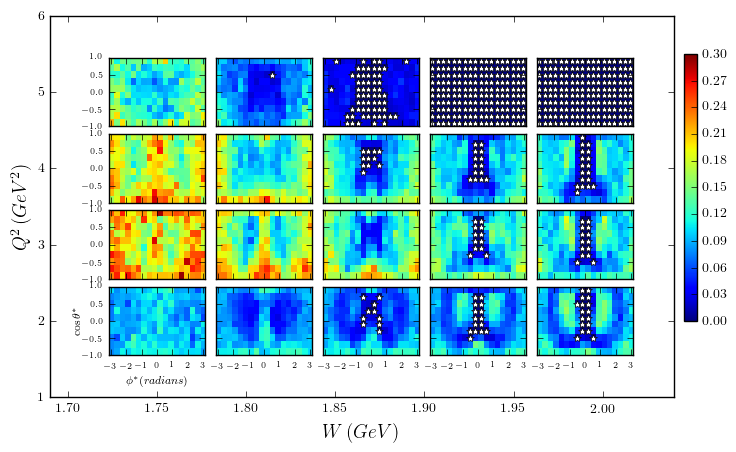

In [79]:
majax_width = 0.96
fig = plt.figure(figsize=goldenaspect(6.5))
ax = fig.add_axes([0,0,majax_width,1])
# ax = fig.gca()
ax.set_xlim(1.69,2.04)
ax.set_ylim(1,6)
ax.set_ylabel(r'$Q^2\,(GeV^2)$', fontdict={'fontsize':14})
ax.set_xlabel(r'$W\,(GeV)$', fontdict={'fontsize':14})
# ax.grid()

vmax=0.3
im = None
first_Q2 = True
for sd,q2r,Q2 in zip(sds,q2rs,[i+2.0 for i in range(0,len(q2rs))]):
    first_W = True
    for W in np.arange(1.75,2,0.06): #[1.75, 1.79, 1.83, 1.87, 1.91, 1.95, 1.99]:
        h2s = sd.get_acc2d(W, q2r, lo_acc=0.02, mask=0.15)[0]
        h2 = h2s[4]
        ax1, im1 = add_hist(h2, ax, W, Q2, dW=0.06, vmax=vmax, vmin=0, pad=0.1,
                           hidex=False, hidey=False, majax_w=majax_width)
        h2 = h2s[3]
        h2.nbins(0)
        xy_masks = []
        for iy in range(1,h2.nbins(1)+1):
            for ix in range(1,h2.nbins(0)+1):
                v = h2.z(ix,iy)
                if v == 0:
                    if h2s[0].z(ix,iy) > 0:
                        xy_masks.append((h2.x(ix), h2.y(iy)))
        if len(xy_masks) > 0:
            X,Y = zip(*xy_masks)
            ax1.plot(X,Y, 'w*')
        im = im1 if im is None else im
        if first_W and first_Q2:
            ax1.set_xlabel(r'$\phi^* (radians)$', fontdict={'fontsize':8})
            ax1.set_ylabel(r'$\cos{\theta^*}$', fontdict={'fontsize':8})
            ax1.yaxis.labelpad = 0
        if not first_W:
            ax1.set_yticklabels([])
        first_W = False
        if not first_Q2:
            ax1.set_xticklabels([])
    first_Q2 = False

fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
plt.xticks([])
plt.yticks([])
# plt.ylabel(ylabel)
# plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

fig.savefig('acc_e1f_sample_zoom.pdf', bbox_inches='tight')
plt.show()


In [29]:
hacc,herr = None, None
hacc_b, herr_b = None, None
hacc_c, herr_c = None, None
hacc_d, herr_d = None, None
for sd,q2r,Q2 in zip(sds,q2rs,[i+2.0 for i in range(0,len(q2rs))]):
    for W in np.arange(1.73,2.8,0.02): # [1.73+, 2.01, 2.21, 2.41, 2.61, 2.81]:
        h2 = sd.get_acc2d(W, q2r)[0][2]
        if herr is None:
            (hacc,herr) = ed.get_vhists(h2)
        else:
            for htot,hthis in zip([hacc,herr],ed.get_vhists(h2)):
                htot.Add(hthis)
        if herr_b is None:
            (hacc_b,herr_b) = ed.get_vhists(h2, emax=0.15)
        else:
            for htot,hthis in zip([hacc_b,herr_b],ed.get_vhists(h2, emax=0.15)):
                htot.Add(hthis)
        if herr_c is None:
            (hacc_c,herr_c) = ed.get_vhists(h2, vmin=0.02)
        else:
            for htot,hthis in zip([hacc_c,herr_c],ed.get_vhists(h2, vmin=0.02)):
                htot.Add(hthis)
        if herr_d is None:
            (hacc_d,herr_d) = ed.get_vhists(h2, vmin=0.02, emax=0.15)
        else:
            for htot,hthis in zip([hacc_d,herr_d],ed.get_vhists(h2, vmin=0.02, emax=0.15)):
                htot.Add(hthis)

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/numpy/ma/extras.py:588: RuntimeWarning: invalid value encountered in double_scalars
  result = n / d


/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


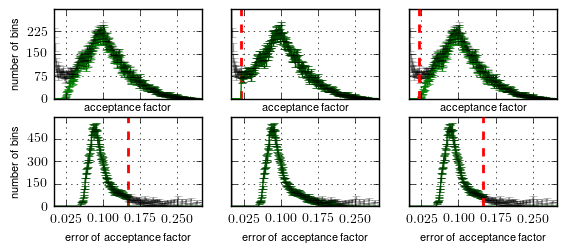

In [189]:
# fig, axes = plt.subplots(3,2, sharex='col')
fig = plt.figure(0, figsize=goldenaspect(6.5,2,3))
axes = [plt.subplot2grid((2,3), (0,0)),
        plt.subplot2grid((2,3), (1,0)),
        plt.subplot2grid((2,3), (0,1)),
        plt.subplot2grid((2,3), (1,1)),
        plt.subplot2grid((2,3), (0,2)),
        plt.subplot2grid((2,3), (1,2))]
xmaxs = [0.3,0.3]
ymaxs = [300,600]
for h,hb,ax,xmax,ymax in zip([hacc,herr],[hacc_b,herr_b],axes[0:2],xmaxs,ymaxs):
    ax.errorbar(list(hb.x()), list(hb.y()), list(hb.yerrh()), None, 'g-')
    ax.errorbar(list(h.x()), list(h.y()), list(h.yerrh()), None, 'k-', alpha=0.35)
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.grid()
for h,hc,ax,xmax,ymax in zip([hacc,herr],[hacc_c,herr_c],axes[2:4],xmaxs,ymaxs):
    ax.errorbar(list(hc.x()), list(hc.y()), list(hc.yerrh()), None, 'g-')
    ax.errorbar(list(h.x()), list(h.y()), list(h.yerrh()), None, 'k-', alpha=0.35)
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.grid()
for h,hd,ax,xmax,ymax in zip([hacc,herr],[hacc_d,herr_d],axes[4:],xmaxs,ymaxs):
    ax.errorbar(list(hd.x()), list(hd.y()), list(hd.yerrh()), None, 'g-')
    ax.errorbar(list(h.x()), list(h.y()), list(h.yerrh()), None, 'k-', alpha=0.35)
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.grid()
axes[1].vlines(0.15,0,ymaxs[1], 'r', 'dashed', linewidth=2)
axes[2].vlines(0.02,0,ymaxs[0], 'r', 'dashed', linewidth=2)
axes[5].vlines(0.15,0,ymaxs[1], 'r', 'dashed', linewidth=2, zorder=20)
axes[4].vlines(0.02,0,ymaxs[0], 'r', 'dashed', linewidth=2, zorder=20)
no_xticks = [0,2,4]
for iax in range(0,6):
    if iax in no_xticks:
        axes[iax].set_xticklabels([])
        axes[iax].set_xlabel('acceptance factor', fontsize=8)
        axes[iax].xaxis.labelpad = -2
    else:
        axes[iax].set_xlabel('error of acceptance factor', fontsize=8)
    if iax in [2,3,4,5]:
        axes[iax].set_yticklabels([])
    else:
        axes[iax].set_ylabel('number of bins', fontsize=8)
    ymax = axes[iax].get_ylim()[1]
    axes[iax].set_yticks(np.arange(0,ymax,ymax/4))
    axes[iax].set_xticks(np.arange(0.025,0.3,0.075))
fig.savefig('acc_e1f_loacc_err.pdf', bbox_inches='tight')
fig.show()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


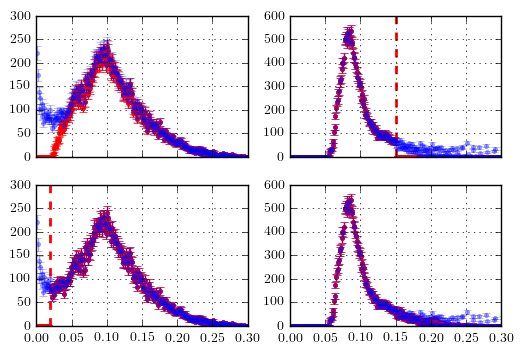

In [28]:
fig, axes = plt.subplots(3,2, sharex='col')
axes = fig.axes
xmaxs = [0.3,0.3]
ymaxs = [300,600]
for h,hb,ax,xmax,ymax in zip([hacc,herr],[hacc_b,herr_b],axes[0:2],xmaxs,ymaxs):
    ax.errorbar(list(hb.x()), list(hb.y()), list(hb.yerrh()), None, 'r.')
    ax.errorbar(list(h.x()), list(h.y()), list(h.yerrh()), None, '.', alpha=0.35)
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.grid()
for h,hc,ax,xmax,ymax in zip([hacc,herr],[hacc_c,herr_c],axes[2:],xmaxs,ymaxs):
    ax.errorbar(list(hc.x()), list(hc.y()), list(hc.yerrh()), None, 'r.')
    ax.errorbar(list(h.x()), list(h.y()), list(h.yerrh()), None, '.', alpha=0.35)
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.grid()
axes[1].vlines(0.15,0,ymaxs[1], 'r', 'dashed', linewidth=2)
axes[2].vlines(0.02,0,ymaxs[0], 'r', 'dashed', linewidth=2)
fig.show()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/numpy/ma/extras.py:588: RuntimeWarning: invalid value encountered in double_scalars
  result = n / d


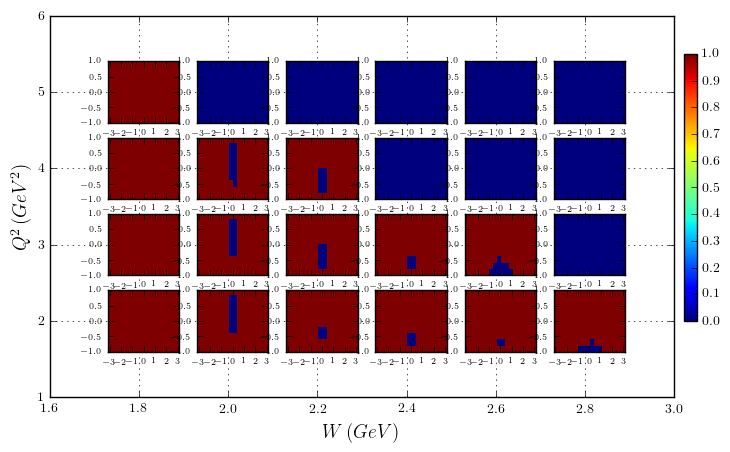

.


In [23]:
majax_width = 0.96
fig = plt.figure(figsize=goldenaspect(6.5))
ax = fig.add_axes([0,0,majax_width,1])
# ax = fig.gca()
ax.set_xlim(1.6,3.0)
ax.set_ylim(1,6)
ax.set_ylabel(r'$Q^2\,(GeV^2)$', fontdict={'fontsize':14})
ax.set_xlabel(r'$W\,(GeV)$', fontdict={'fontsize':14})
ax.grid()

vmax=1
im = None
for sd,q2r,Q2 in zip(sds,q2rs,[i+2.0 for i in range(0,len(q2rs))]):
    for W in [1.81, 2.01, 2.21, 2.41, 2.61, 2.81]:
        h2 = sd.get_acc2d(W, q2r, lo_acc=0.001, mask=0.05)[0][3]
        ax1, im1 = add_hist(h2, ax, W, Q2, vmax=vmax, vmin=0,
                           hidex=False, hidey=False, majax_w=majax_width)
        im = im1 if im is None else im

fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
plt.xticks([])
plt.yticks([])
# plt.ylabel(ylabel)
# plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()
print('.')

In [118]:
from rootpy.io import root_open

g = None
with root_open('../e1f6/test/e1f_sim_skim_top1_ho.root') as fin:
    g = fin['h6recon/h_nbins']

plt.plot(list(g.x()), list(g.y()), '.')

X,Y = zip(*zip(list(g.x()),list(g.y())))

Xp,Yp = zip(*[((x0+x1)/2,(y1-y0)/(x1-x0)) for (x0,x1,y0,y1) in zip(X[:-1],X[1:],Y[:-1],Y[1:])])

plt.plot(Xp,Yp,'.')

xys = sorted(zip(X[1:],Y[1:],[y*1e6 for y in Yp]), key=lambda tup: tup[2], reverse=True)
xys0,xys1,xys2 = zip(*xys)
Yp_int = np.cumsum(xys2)

Xs,Ys = zip(*[(i*1e6,ypint) for i,((x,y,yp),ypint) in enumerate(zip(xys,Yp_int))])
Xs,Ys = [0]+[x+1e6 for x in Xs],[0]+[y+8e4 for y in Ys]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
ax1.plot(Xs,Ys,'.-')
ax1.set_ylim(0,6e5)
ax1.grid()
ax1.set_xlabel('events thrown')
ax1.set_ylabel('bins filled with\nreconstructed events')
# ax2.plot(Xs,[.1]+[yp/1e6 for yp in xys2],'.-')
ax2.plot(Xs,[1e5]+list(xys2),'.-')
ax2.set_ylim(100,2e5)
ax2.set_yscale('log')
ax2.grid()
ax2.set_xlabel('events thrown')
ax2.set_ylabel('bins filled per\nmillion events')

ax1.get_yaxis().get_major_formatter().set_powerlimits((0, 2))
# ax1.ticklabel_format(style='sci', axis='y', ) 
# ax2.yaxis.labelpad = 0
# ax1.yaxis.labelpad = 0
plt.tight_layout()
fig.savefig('acc_e1f_bins_filled.pdf', bbox_inches='tight')
# plt.ylim(0,6e5)

In [156]:
Xs[:2]

[0, 1000000.0]